## BBM409 Introduction to Machine Learning Lab.  Fall 2022.
# Assignment 2: PART 1 :  Employee Attrition Prediction

### Contributors:

### Ali Argun Sayilgan   : 21827775
### Mehmet Giray Nacakci :  21989009

## Please run this report with   "RUN ALL" command

### It takes less than 10 minutes on average to get all the results.


# Dataset

The dataset consists of past and current employees of a company in a spreadsheet. It has 35 data points for the employees, including the ground truth label(attrition). At this assignment, we will be investigating how other attributes of the employees' relates to workforce attrition using decision tree ML model.

Education <br /> 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction <br />
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating  <br />
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

WorkLifeBalance <br />
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.options.display.max_columns = len(df.columns)
pd.set_option('display.precision', 6)
header = df.drop(['Attrition'], axis=1).columns
ground_truth_label = "Attrition"
ground_truth_classes = df.Attrition.unique()

df.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## Number of occurences of class types


In [2]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Preprocessing

As can seen, there's an inbalance for ground truth labels at the dataset.

In this project we prefer not to do any additional preproccessing steps.

To train decision tree model, we must split the dataset into X(employee's attributes) and y(attrition status Yes/No).

In [3]:
X = df.drop(['Attrition'], axis=1)
y = df.Attrition
mode_of_each_column = X.mode().iloc[0].to_list()

X = X.to_numpy()
Y = y.to_numpy()

# ML model performance evaluation methods
### Confusion matrix
Confusion matrix is an N x N matrix used for evaluating the performance of a classification model. It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and AUC-ROC curves.

In [4]:
def accuracy(preds, labels):
    """Calculates accuracy given two numpy arrays"""
    return np.mean(preds == labels)

def confusion_matrix(preds, labels, num_of_labels):
    """Creates a confusion matrix from given two numpy arrays"""
    unique_label_classes = np.sort(np.unique(labels)) 
    int_encoded_labels = np.searchsorted(unique_label_classes,labels)
    int_encoded_pred = np.searchsorted(unique_label_classes,preds)

    matrix = np.zeros((num_of_labels,num_of_labels))
    for i in range(len(preds)):
        matrix[int_encoded_pred[i],int_encoded_labels[i]] += 1
    return matrix    

def precision_and_recall(preds, labels):
    """Returns individual Precision and Recall values of each class"""
    num_of_labels = len(np.unique(labels))
    matrix = confusion_matrix(preds, labels, num_of_labels)
    r = []
    p = []
        
    number_of_not_NA_precision, number_of_not_NA_recall, precision_sum, recall_sum = 0, 0, 0, 0

    for i in range(num_of_labels):
        TP = float(matrix[i,i])
        TP_FP = np.sum(matrix[i,:])
        TP_FN = np.sum(matrix[:,i])

        if TP_FN != 0:
            recall_sum += TP / TP_FN
            number_of_not_NA_recall +=1

        if TP_FP != 0:
            precision_sum += TP / TP_FP
            number_of_not_NA_precision +=1

    recall = recall_sum / number_of_not_NA_recall if number_of_not_NA_recall != 0 else "NA"
    precision = precision_sum / number_of_not_NA_precision if number_of_not_NA_precision != 0 else "NA"

    return (precision, recall)


def fscore(preds, labels):
    """Calculates macro f score given two numpy arrays"""
    pred_labels, pred_numberized = np.unique(preds, return_inverse=True)
    labels, labels_numberized = np.unique(labels, return_inverse=True)
    p, r = precision_and_recall(pred_numberized, labels_numberized)
    if p == "NA" or r == "NA" or p+r == 0:
        return "NA"

    return 2*p*r/(p+r)

## Helper functions that are used at ID3 Decision Tree Algorithm 

In [5]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

In [6]:
def class_counts(numpy_arr):
    """Returns the unique elements that are inside the
    numpy array, and their individual counts"""

    if len(numpy_arr.shape)==2:
        valueCounts = pd.Series(numpy_arr[:, 0]).value_counts()
        return np.array(valueCounts.keys().to_list()), np.array(valueCounts.to_list())
    else:
        valueCounts = pd.Series(numpy_arr).value_counts()
        return np.array(valueCounts.keys().to_list()), np.array(valueCounts.to_list())

In [7]:
class Question:
    """Questions are used to partition a dataset."""

    def __init__(self, column, partition_values, partition_type):
        self.column = column
        self.partition_values = partition_values
        self.partition_type = partition_type



    def match(self, row):
        """Answers question for a particular row (sample).
        Return index of which Child Branch to go."""
        
        if self.partition_type == "discrete":
            for t, val in enumerate(self.partition_values):
                if row[self.column] == val:
                    return t
            
            # if test data has a value not seen while training
            # unseen label is getting considered as mode label of that column
            for t, val in enumerate(self.partition_values):
                if mode_of_each_column[self.column] == val:
                    return t
            return 0


        # for continuous value, assign index of appropriate interval node child
        elif self.partition_type == "interval":
            if len(self.partition_values) == 1:
                return 0

            for k in range(1,len(self.partition_values)-1):
                if self.partition_values[k-1] <= row[self.column] < self.partition_values[k]:
                    return k
            if row[self.column] >= self.partition_values[-2]:
                return len(self.partition_values)-1
            if row[self.column] < self.partition_values[0]:
                return 0


    def __repr__(self):
        """Helper method to print question in readable form"""

        if self.partition_type == "discrete":
            return "which {} category ?".format(header[self.column])

        elif self.partition_type == "interval":
            return "which {} interval ?".format(header[self.column])

        equality_condition = "=="
        if is_numeric(self.value):
            if self.partition_type == "discrete":
                return "Is {} {} {} ?".format(header[self.column], equality_condition, str(self.value))
            elif self.partition_type == "interval":
                return "Is {} at range {} ?".format(header[self.column], str(self.value))

            return "Is {} {} {} ?".format(header[self.column], equality_condition, str(self.value))


### Entropy

Entropy is the degree of uncertainty, impurity or disorder of a random variable, or a measure of purity. It characterizes the impurity of an arbitrary class of examples. 

It can be calculated as shown in the figure below. i denotes each ground truth label.

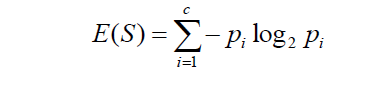

In [8]:
def entropy(Y):
    """Calculate entropy of data from labels"""
    labels, counts = class_counts(Y)
    probs = counts / float(Y.shape[0])
    entropy = - np.sum(probs * np.log2(probs))
    return entropy

### Information Gain

<b>Information Gain = Entropy before splitting - Entropy after splitting</b>


The concept of entropy plays an important role in measuring the information gain. However, “Information gain is based on the information theory”.

It is used for determining the best features/attributes that render maximum information about a class. It follows the concept of entropy while aiming at decreasing the level of entropy, beginning from the root node to the leaf nodes. Information gain computes the difference between entropy before and after split and specifies the impurity in class elements.

<br/>

#### Gain Ratio

The gain ratio measure penalizes attributes with too many branches (splits),
    since their information gain is high but prediction accuracy is low.
    Using gain_ratio rather than information_gain can reduce overfitting problem.


In [9]:
def information_gain(y, intervals_indexes, current_entropy):
    """Information Gain:  The Entropy of the starting node, minus the weighted entropy of child nodes. """
    sum_ = 0
    len_sum = 0

    # weighted sum of entropies of each split (or interval)
    for interval_indices in intervals_indexes:

        sum_ += float( len(interval_indices) * entropy(y[interval_indices]) )
        len_sum += len(interval_indices)

    return current_entropy - sum_ / len_sum



def gain_ratio(y, intervals_indexes, current_entropy):
    """ Information_Gain divided by entropies of sub-dataset proportions. """

    # "split information" measure
    len_sum = 0
    for interval_indices in intervals_indexes:
        len_sum += len(interval_indices)

    sum_ = 0
    for interval_indices in intervals_indexes:
        sum_ += len(interval_indices) * np.log2(len_sum / len(interval_indices))
    split_information = sum_ / len_sum

    # prevent division by zero
    if split_information < 0.0001:
        split_information = 0.0001

    return information_gain(y, intervals_indexes, current_entropy) / split_information


# Decision Tree ML Model

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.<br /><br />
Decision Tree models are created using 2 steps: <u>induction and pruning</u>. Induction is where we actually build the tree i.e set all of the hierarchical decision boundaries based on our data. Because of the nature of training decision trees they can be prone to major overfitting. Pruning is the process of removing the unnecessary structure from a decision tree, effectively reducing the complexity to combat overfitting with the added bonus of making it even easier to interpret.

## ID3 Decision Tree Algorithm

ID3 stands for Iterative Dichotomiser 3 and is named such because the algorithm iteratively (repeatedly) dichotomizes(divides) features into two or more groups at each step.

* It uses a top-down greedy approach to build a decision tree. The top-down approach, means that it starts building the tree from the top and the greedy means that at each iteration it selects the best feature at the present moment to create a node.
<br/>

* The inductive bias in ID3 includes a preference for smaller trees.
<br/>

* ID3 uses Information Gain to find the best feature. Information Gain calculates the reduction in the entropy and measures how well a given feature separates or classifies the target classes. The feature with the highest Information Gain is selected as the best one. With slight modification, using Gain_Ratio measure instead of gain, actually gives better prediction results since it favors attributes with fewer branches, and thus reduces overfitting.
<br/>

* Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalize to unseen data.
<br/>

* ID3 does not guarantee an optimal solution. It can converge upon local optima.
<br/>

* Most generally it is only used for classification problems with nominal features only. Nominal data is a type of data that is used to label variables without providing any quantitative value.
<br/>

* There are different splitting methods. Multi-way split uses as many partitions as distinct values. Whereas binary split divides values into two subsets. When multi-way splitting continuous data, you can prefer to split the data into intervals to make algorithm more performant. We chose to implement multi-way splits in this experiment. Multi-way split method enables creating a Decision Tree with much less depth required to make a good prediction, also easier to understand and read.
<br/>

* An example discretization process for creating a multi-way split for continuous valued attributes:
If an attribute has values ranging from 50 to 250, and we choose n_splits = 4, intervals are  (<100), [100,150), [150,200), (>=200).
The n_splits parameter is determined by comparing different values and choosing best one as the one that results in the highest information gain.

```
ID3 (Examples, Target_Attribute, Attributes)
    Create a root node for the tree
    If all examples are positive, Return the single-node tree Root, with label = +.
    If all examples are negative, Return the single-node tree Root, with label = -.
    If number of predicting attributes is empty, then Return the single node tree Root,
    with label = most common value of the target attribute in the examples.
    Otherwise Begin
        A ← The Attribute that best classifies examples.
        Decision Tree attribute for Root = A.
        For each possible value, vi, of A,
            Add a new tree branch below Root, corresponding to the test A = vi.
            Let Examples(vi) be the subset of examples that have the value vi for A
            If Examples(vi) is empty
                Then below this new branch add a leaf node with label = most common target value in the examples
            Else below this new branch add the subtree ID3 (Examples(vi), Target_Attribute, Attributes – {A})
    End
    Return Root
```



In [10]:
class Node:
    """ Holds a reference to the question, and the child nodes that is partitioned by the question. """
    def __init__(self, child_branches, question, gain, y):
        self.child_branches = child_branches
        self.question = question
        self.gain = gain

        counts = np.column_stack(class_counts(y))
        self.label_counts = {row[0]:row[1] for row in counts}


In [11]:
class Leaf:
    """
    Leaf node contains a dictionary of counts of classes.
    Output is usually the majority class.
    """
    def __init__(self, y):
        
        # y passed as predictions dictionary while pruning the tree
        if(type(y) is dict):
            self.predictions = y
        else:
            counts = np.column_stack(class_counts(y))
            self.predictions = {row[0]:row[1] for row in counts}
        


In [15]:
from scipy import stats
class Decision_Tree:

    def __init__(self, maximum_depth):
        self.depth = maximum_depth


    def train(self, X_train, y_train):
        mode_of_each_column = stats.mode(X_train)[0][0] # is used when there is unseen labels inside test data
        self.root = self._build_tree(X_train, y_train, self.depth, [])
    

    def find_best_split(self, X, y, used_attributes):
        """
        Find the best question to ask by iterating over every feature.
        Choose the best possible attribute and best possible split in terms of information gain.
        """
        copy_used_attributes = used_attributes[0:]
        best_gain = 0  
        best_question = None
        best_partition = []
        used_attribute = 0
        current_entropy = entropy(y)
        n_features = X.shape[1]  

        # To not use any attribute (to split the data-subset) twice, in a single path from root to leaf.
        for col in range(n_features):
            if col in copy_used_attributes:
                continue

            # if this column is a continuous attribute: it needs Discretization
            if is_numeric(X[0,col]):

                this_column = X[:,col]
                min_ = np.min(this_column)
                max_ = np.max(this_column)

                # rarely, but in the case that all values are same:
                if min_ == max_:  # no split (so-called split into only one branch, not two.)
                    partition_to_indexesOfSamples = [X[:, col] <= max_]
                    gain = information_gain(y, partition_to_indexesOfSamples, current_entropy)
                    if gain >= best_gain:
                        best_gain = gain
                        best_partition = partition_to_indexesOfSamples
                        best_question = Question(col, [min_], "interval")
                        used_attribute = col

                else:
                    # find best number of splits in terms of information gain
                    for n_splits in range(2,10):
                        interval_size = (max_ - min_)/n_splits

                        range_values = []
                        partitions_to_indexesOfSamples = []

                        # create partitions (intervals)
                        # n_split = n many intervals
                        for m in range(n_splits):

                            range_values.append(min_ + (m+1)*interval_size)
                            indexes_in_this_interval = []

                            if m == 0:
                                indexes_in_this_interval = X[:, col] < min_ + interval_size
                            elif m == n_splits-1:
                                indexes_in_this_interval = X[:, col] >= min_ + m * interval_size
                            else:
                                indexes_in_this_interval = filter_interval(X, col, min_, m, interval_size)

                            partitions_to_indexesOfSamples.append(indexes_in_this_interval)


                        """ Do not choose such partitioning that some empty tree branches will be created. """

                        empty_interval_alert = False

                        for indexes_in_this_interval in partitions_to_indexesOfSamples:
                            if len(indexes_in_this_interval) < 1:
                                empty_interval_alert = True
                                break

                        # skip the current n_split value. n_split many intervals is not what we are looking for.
                        if empty_interval_alert:
                            continue

                        gain = gain_ratio(y, partitions_to_indexesOfSamples, current_entropy)

                        if gain >= best_gain:
                            best_gain = gain
                            best_partition = partitions_to_indexesOfSamples
                            best_question = Question(col, range_values, "interval")
                            used_attribute = col


            # this column is a discrete attribute
            else:
                # multi-way split: as many branches as len(unique_values)
                unique_values = np.unique(X[:,col])
                partitions_to_indexesOfSamples = []

                for value in unique_values:
                    indexes_in_this_partition = X[:, col] == value
                    partitions_to_indexesOfSamples.append(indexes_in_this_partition)

                gain = gain_ratio(y, partitions_to_indexesOfSamples, current_entropy)

                if gain >= best_gain:
                    best_gain = gain
                    best_partition = partitions_to_indexesOfSamples
                    best_question = Question(col, unique_values, "discrete")
                    used_attribute = col

        copy_used_attributes.append(used_attribute)
        return best_gain, best_partition, best_question, copy_used_attributes


        
    def _build_tree(self, X_train, y_train, depth, used_attributes):
        """ recursive decision tree building function """

        if X_train.shape[0] < 2:
            return Leaf(y_train)

        if depth < 1:
            return Leaf(y_train)


        all_samples_in_subset_are_same_label = np.all(y_train == y_train[0])
        if all_samples_in_subset_are_same_label:
            return Leaf(y_train)


        gain, partitions, question, used_attributes = self.find_best_split(X_train, y_train, used_attributes)

        if gain == 0 or question is None:
            return Leaf(y_train)


        child_branches = []
        for indices_in_this_partition in partitions:
            child_branches.append( self._build_tree(X_train[indices_in_this_partition], y_train[indices_in_this_partition], depth-1, used_attributes) )

        return Node(child_branches, question, gain, y_train)



    def predict(self, row):
        prediction = self._classify(row, self.root)
        return prediction
    
    def _classify(self, row, node):
        """Recursively traverses the decision tree towards a prediction(Leaf node)"""

        # Base case: At a leaf node
        if isinstance(node, Leaf):
            max_count = 0
            max_label = None

            for k, v in node.predictions.items():
                if int(v) >= max_count:
                    max_count = int(v)
                    max_label = k

            return max_label

        branch_to_go = node.child_branches[node.question.match(row)]
        return self._classify(row, branch_to_go)


    def test(self, X_test, y_test):
        """Returns accuracy and fscore of test dataset"""
        # Not vectorized.
        preds = []

        for i, row in enumerate(X_test):
            preds.append(self.predict(row))
            
        preds = np.array(preds)

        a = accuracy(preds, y_test)
        f = fscore(preds, y_test)
        p,r = precision_and_recall(preds, y_test)
        
        return a, f, p, r



def filter_interval(X, col, min_, m, interval_size):
    indices = []
    for j in range(np.shape(X)[0]):
        if (min_ + m * interval_size) <= X[j, col] < (min_ + (m + 1) * interval_size):
            indices.append(j)
    return indices


# Cross validation scores

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.


A solution to this problem is a procedure called cross-validation. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller setss. The following procedure is followed for each of the k “folds”:
  * A model is trained using  of the folds as training data;
  * the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

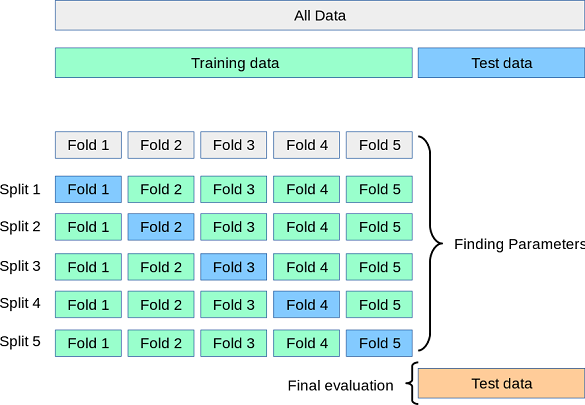



# Visual Representation of Decision Tree

In [13]:
def print_tree(node, markerStr="+- ", levelMarkers=[]):
    level = len(levelMarkers)
    emptyStr = " " * 15
    connectionStr = "|" + emptyStr[:-4]
    mapper = lambda draw: connectionStr if draw else emptyStr
    markers = "".join(map(mapper, levelMarkers[:-1]))
    markers += markerStr if level > 0 else ""

    if isinstance(node, Leaf):
        print(f"{markers}Prediction ({ground_truth_label}): {node.predictions}")
        return

    print(f"{markers}{node.question}")
    if (node.question.partition_type == "discrete"):
        for i, child in enumerate(node.child_branches):
            label_answer = "("+ str(node.question.partition_values[i])+ ") -- "
            isLast = i==len(node.child_branches)-1
            print_tree(child, 
                      label_answer, [*levelMarkers, not isLast])

    else:  
        for i, child in enumerate(node.child_branches):
            if(i==0):
                range_answer = "("+ " ," + format(node.question.partition_values[i], '.2f') + ") -- "
            elif(i==len(node.child_branches)-1):
                range_answer = "["+ format(node.question.partition_values[i-1], '.2f') + ", ) -- "
            else:
                range_answer = "["+ format(node.question.partition_values[i-1], '.2f') + "," + format(node.question.partition_values[i], '.2f') + ") -- "
            
            isLast = i==len(node.child_branches)-1
            print_tree(child, 
                      range_answer, [*levelMarkers, not isLast])

# Error Analysis for Classification

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=24, shuffle=True)
import time

scores_array=[]
for max_depth in [2, 3, 4, 5, 6, 15]:
    row = []
    print("max_depth : " + str(max_depth))
    i = 1

    test_F_scores, test_accuracies, test_ps, test_rs = [], [], [], []
    train_F_scores, train_accuracies, train_ps, train_rs = [], [], [], []

    start = time.time()
    for train_index, test_index in kf.split(X):

        print("   fold" + str(i) +  " :    " , end=" ")
        i += 1

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        model = Decision_Tree(max_depth)
        model.train(X_train, y_train)

        train_acc, train_f, train_p, train_r = model.test(X_train,y_train)
        print("Train : F1 Score: {:.3f}, Accuracy: {:.3f}     ".format(train_f, train_acc), end="")

        test_acc, test_f, test_p, test_r = model.test(X_test, y_test)

        test_accuracies.append(test_acc)
        test_F_scores.append(test_f)
        test_ps.append(test_p)
        test_rs.append(test_r)

        train_accuracies.append(train_acc)
        train_F_scores.append(train_f)
        train_ps.append(train_p)
        train_rs.append(train_r)
        print(" TEST : F1 Score: {:.3f} ,  Accuracy: {:.3f}  , Precision: {:.3f} , Recall: {:.3f}".format(test_f, test_acc, test_p, test_r))

    print("   AVERAGE :                                                        F1 Score: {:.3f} ,  Accuracy: {:.3f}  , Precision: {:.3f} , Recall: {:.3f}".format(sum(test_F_scores)/5, sum(test_accuracies)/5, sum(test_ps)/5, sum(test_rs)/5))

    row.extend([max_depth, sum(train_F_scores)/5, sum(test_F_scores)/5, sum(train_accuracies)/5, sum(test_accuracies)/5, 
                sum(train_ps)/5, sum(test_ps)/5, sum(train_rs)/5, sum(test_rs)/5
    ])
    scores_array.append(row)
    finish = time.time()
    seconds = finish-start
    minutes = seconds//60
    seconds -= 60*minutes
    print('Elapsed time: %d:%d   minutes:seconds \n' %(minutes,seconds))

scores_df = pd.DataFrame(scores_array, columns=['max_depth', 'train_f1', 'test_f1','train_accuracy', 'test_accuracy',
                                                'train_precision', 'test_precision','train_recall','test_recall'
                                                ])

Previously calculated:
<br/>

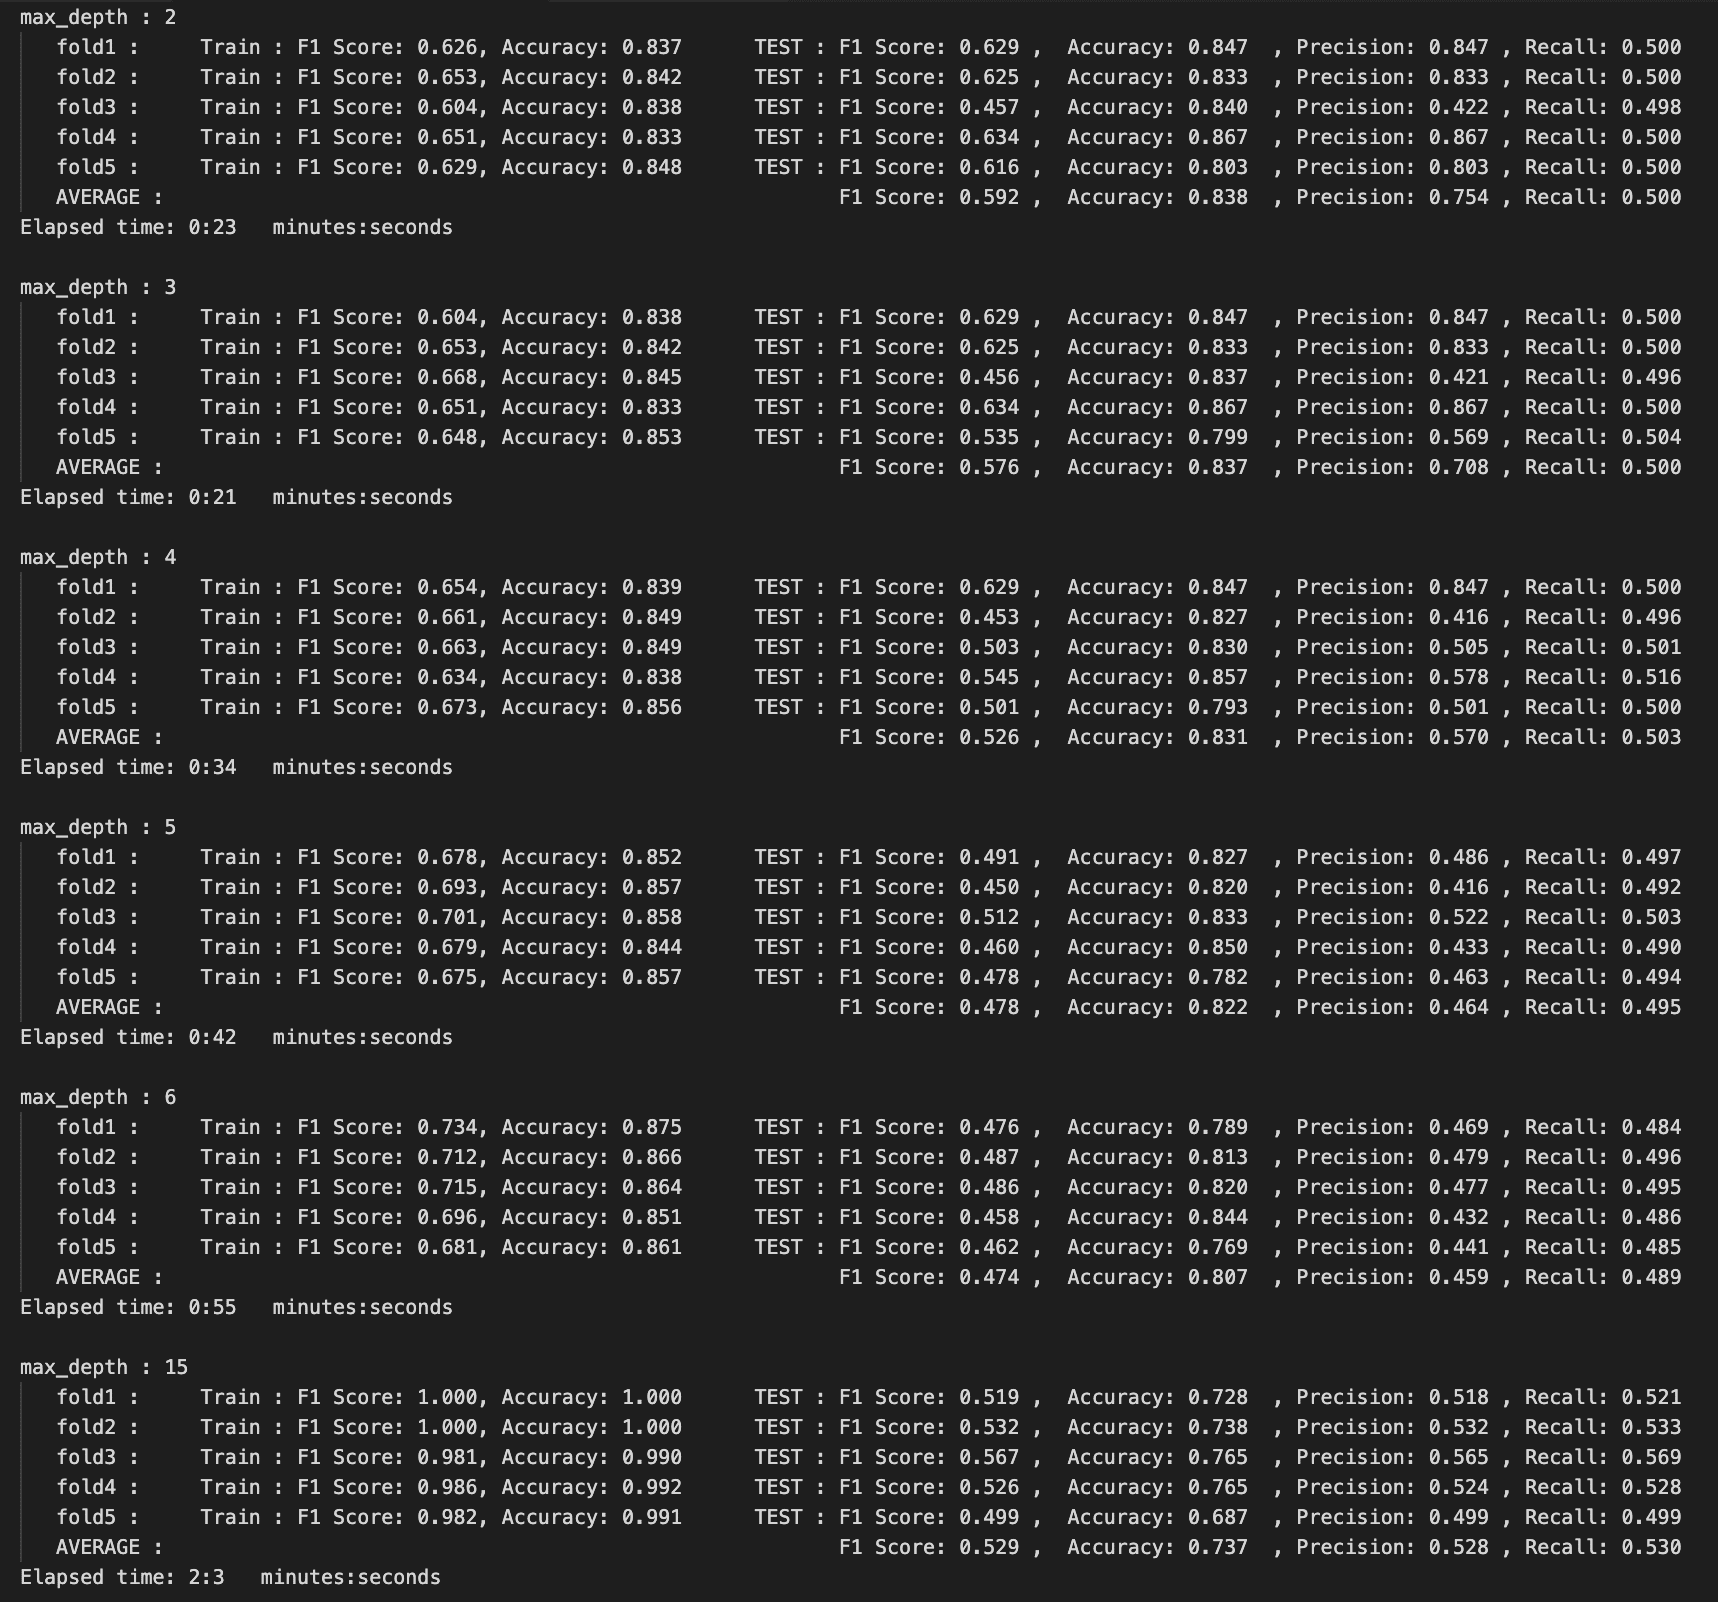

### _It takes less than 10 minutes on average to get all results._

As max_depth increases, model overfits the data. This can be seen from the increase of train classification performance, meanwhile the test performance decreases as max_dept increases.

From the results above, it can be said that 2 is the best parameter for max_depth in this sense but since we will prune the decision tree later we cannot confidently say that the model will perform optimally with this parameter after pruning.

And an important thing to consider when analyzing the results is that the dataset is skewed, so you shouldn't rely too much on accuracy. So we will focus more on the f1 score.

<br/>

And for computational complexity, since tree does not have to be balanced, we cannot be certain. Yet, since for almost all depth levels, in all branches in total, data sub-sets are linearly traversed to find best split. Which brings us around (max_depth) * (dataset_row_count) * (1+2+ ... + dataset_column_count)
complexity, which also experimentally corresponds to our results: having changed only max_depth parameter and observing a linear increase in computation time.

In [ ]:
print("Average of 5 folds:\n")
scores_df

Previously calculated Averages of 5 folds:
<br/>

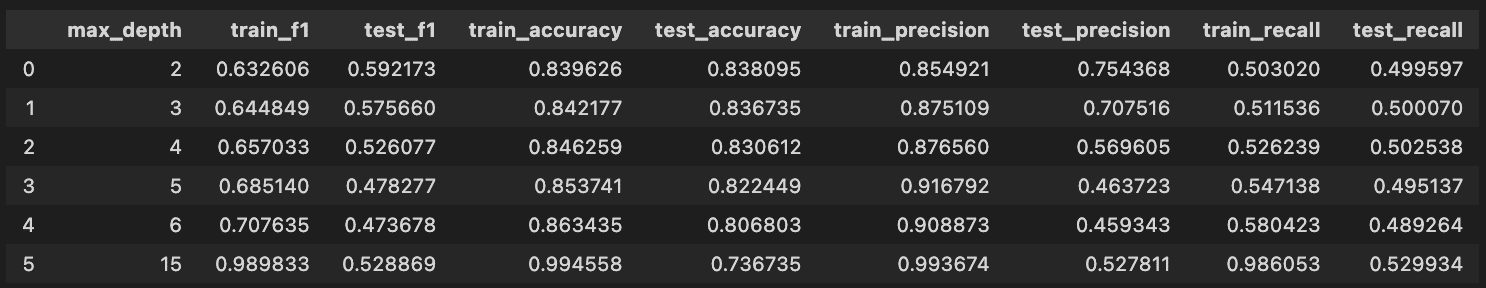

### Attrition imbalance in the Dataset<br />
No:     1233 <br />
Yes:     237 <br />

Even if our model was predicting "No" for every row, we would get 0.8387 train/test accuracy.

# This is how Overfit looks like

Here is a visual representation of the trained decision tree model with max_depth=15, Fold_1.

##### Train : F1 Score: 1.000, Accuracy: 1.000

##### TEST : F1 Score: 0.519 ,  Accuracy: 0.728  , Precision: 0.518 , Recall: 0.521

Model is 100% fitted to the Train set, thus prediction on Test set is very biased and performs relatively bad.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, random_state=24, shuffle=True)
for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        model = Decision_Tree(15)
        model.train(X_train, y_train)

        train_acc, train_f, train_p, train_r = model.test(X_train,y_train)
        print("Train : F1 Score: {:.3f}, Accuracy: {:.3f}     ".format(train_f, train_acc), end="")

        test_acc, test_f, test_p, test_r = model.test(X_test, y_test)
        print(" TEST : F1 Score: {:.3f} ,  Accuracy: {:.3f}   , Precision: {:.3f} , Recall: {:.3f}".format(test_f, test_acc, test_p, test_r))

        break # we only need first fold


In [ ]:
print_tree(model.root)

#### Above tree contains very long text lines and might not print well, due to line wrapping settings. Output exceeds size limit.


#### Previously calculated:

Actual output is 516 lines, this is shortened.
<br/>

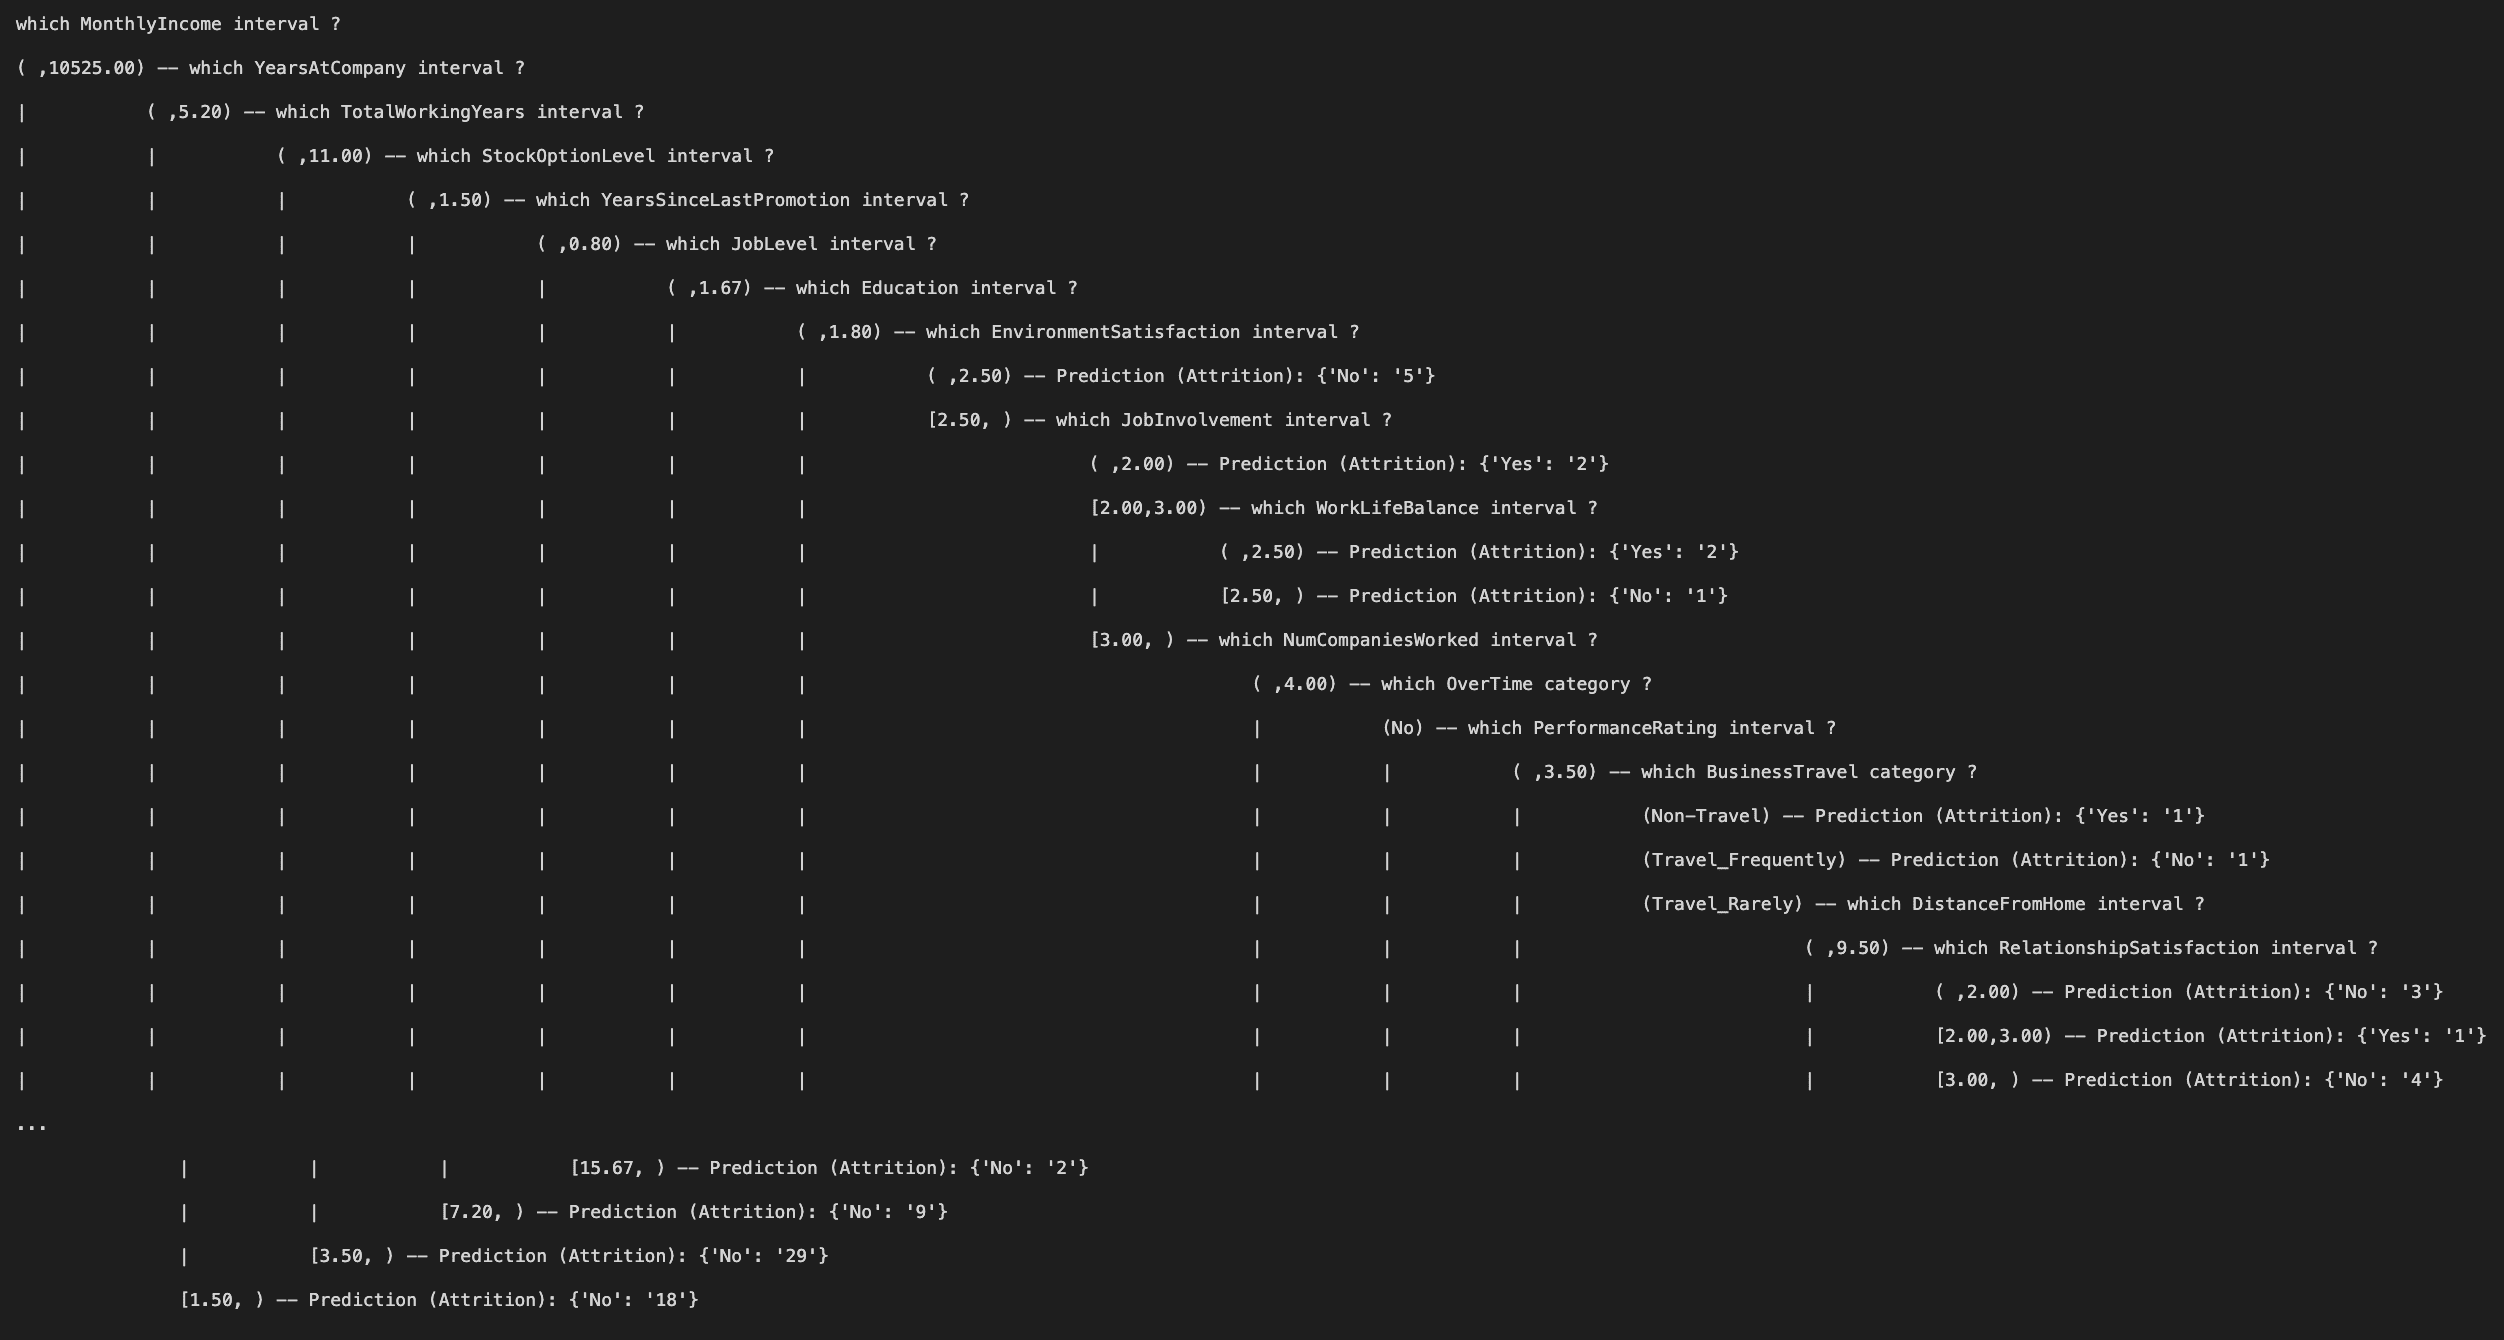

From the tree representation, we can infer that, most leaves has all "YES" or all "NO" answers, 100% certain answers. Model is overfitted to and biased towards the training set, and almost cannot branch out more.

# This is how the Best performed model looks like

Here is a visual representation of the trained decision tree model with max_depth=2, Fold_4.
This is the best model in terms all four F1, Accuracy, Precision, Recall metrics results on Test set.
<br/>

##### Train : F1 Score: 0.651, Accuracy: 0.833
##### TEST : F1 Score: 0.634 ,  Accuracy: 0.867  , Precision: 0.867 , Recall: 0.500

In [ ]:
kf = KFold(n_splits=5, random_state=24, shuffle=True)
this_fold = 0
for train_index, test_index in kf.split(X):

        # we only need fold_4
        this_fold += 1
        if this_fold != 4:
            continue

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        model = Decision_Tree(2)
        model.train(X_train, y_train)

        train_acc, train_f, train_p, train_r = model.test(X_train,y_train)

        test_acc, test_f, test_p, test_r = model.test(X_test, y_test)
        break

In [ ]:
print_tree(model.root)


Previously Calculated:

```
which MonthlyIncome interval ?
( ,10504.00) -- which YearsAtCompany interval ?
|           ( ,13.33) -- Prediction (Attrition): {'No': '738', 'Yes': '179'}
|           [13.33,26.67) -- Prediction (Attrition): {'No': '51', 'Yes': '4'}
|           [26.67, ) -- Prediction (Attrition): {'Yes': '2'}
[10504.00, ) -- which PerformanceRating interval ?
               ( ,3.50) -- Prediction (Attrition): {'No': '158', 'Yes': '13'}
               [3.50, ) -- Prediction (Attrition): {'No': '31'}
```

Model is underfitted to the dataset and probably further branching at most of the leaves is going to cause better prediction performance if pruning done properly. This conclusion can get achieved from the fact that there are some leaves which has big entropy.

```
YearsAtCompany: ( < 5.2)  =>  Prediction (Attrition): {'No': '431', 'Yes': '129'}
```
For example when you consider this leaf, it contains `{'No': 431, 'Yes': 119}` samples at train set. And this leaf's entropy is even bigger than the root's entropy.

Having max_depth as only 2 provides a very general prediction ability. It might not look specific enough, yet as seen from experiment, for this dataset,
the most important 3 features that effect Employee Attrition are:
* MonthlyIncome
* YearsAtCompany
* StockOptionLevel

# Comment on misclassifications

```
which MonthlyIncome interval ?
( ,10504.00) -- which YearsAtCompany interval ?
|           ( ,13.33) -- Prediction (Attrition): {'No': '738', 'Yes': '179'}
|           [13.33,26.67) -- Prediction (Attrition): {'No': '51', 'Yes': '4'}
|           [26.67, ) -- Prediction (Attrition): {'Yes': '2'}
[10504.00, ) -- which PerformanceRating interval ?
               ( ,3.50) -- Prediction (Attrition): {'No': '158', 'Yes': '13'}
               [3.50, ) -- Prediction (Attrition): {'No': '31'}
```

In above Decision Tree example (best model with max_depth=2), when any sample in Test set follows ```(MonthyIncome < 10504) and (YearsAtCompany < 13.33)``` condition, it's attrition will be directly classified (predicted) as "NO". However, as can be seen even in the training set, there is 19%  (179/917) error.
Assuming test set shows a similar attrition distribution as training set, if we tried to classify 10 samples with such conditions, 2 of them will be misclassified. Let us assume this was an under-fitted branch.

The branch with ```(MonthyIncome < 10504) and ( YearsAtCompany >= 26.67 )``` condition is much more specific and less generalized, can be considered "over-fitted". If any sample providing this condition is Attrition:"No", it will be misclassified as "Yes" with 100% chance.

Overall, over-fitting and under-fitting are both error-prone, yet over-fitting is more dangerous.
This idea is also supported by our experiment results since our max_depth=2 model performs better than higher depth models.

Another point is that, the model is already very biased towards saying “No”, since it was trained with around 85% “No” answers.
<br/>


### Let us see real examples:
Based on same model's (best model with max_depth = 2) conditions, here are a few misclassified examples of ```(YearsAtCompany < 13.33)``` branch:

In [ ]:
df_test_data = df.filter(items=test_index, axis=0)

# In this branch, "Yes" Test samples will be misclassified as "No", since majority in Training is "No" .
df_misclassified = df_test_data[(df_test_data['MonthlyIncome']<10504.00) & (df_test_data['YearsAtCompany']<13.33) & (df_test_data['Attrition'] == 'Yes')]
df_misclassified = df_misclassified[['MonthlyIncome', 'YearsAtCompany', 'Attrition']]
df_correct_classified = df_test_data[(df_test_data['MonthlyIncome']<10504.00) & (df_test_data['YearsAtCompany']<13.33) & (df_test_data['Attrition'] == 'No')]
df_correct_classified = df_correct_classified[['MonthlyIncome', 'YearsAtCompany', 'Attrition']]

#reordering columns
df_misclassified.insert(0, 'Attrition', df_misclassified.pop("Attrition"))
df_misclassified.insert(0, 'MonthlyIncome', df_misclassified.pop("MonthlyIncome"))
df_misclassified.insert(0, 'YearsAtCompany', df_misclassified.pop("YearsAtCompany"))

df_correct_classified.insert(0, 'Attrition', df_correct_classified.pop("Attrition"))
df_correct_classified.insert(0, 'MonthlyIncome', df_correct_classified.pop("MonthlyIncome"))
df_correct_classified.insert(0, 'YearsAtCompany', df_correct_classified.pop("YearsAtCompany"))


In [ ]:
print("\nHere are a few misclassified samples at indexes:")
display(df_misclassified.head(10).T)
print("... as expected.")

Previously calculated:
<br/>

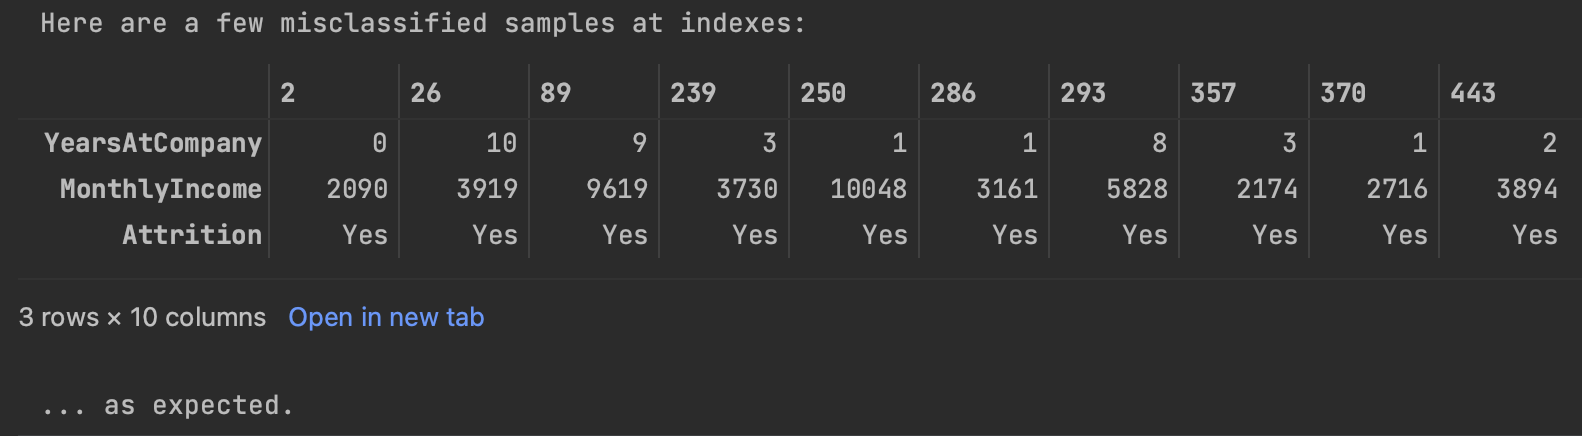

# Assignment 2: PART 2 :  Pruning Decision Tree
<br/>

## Decision Tree Pruning
Pruning is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

One of the questions that arises in a decision tree algorithm is the optimal size of the final tree. A tree that is too large risks overfitting the training data and poorly generalizing to new samples. A small tree might not capture important structural information about the sample space. However, it is hard to tell when a tree algorithm should stop because it is impossible to tell if the addition of a single extra node will dramatically decrease error. This problem is known as the horizon effect. A common strategy is to grow the tree until each node contains a small number of instances then use pruning to remove nodes that do not provide additional information.
<br /><br /><br />
Pruning can be performed in many ways. In this experiment we will be using <u>pruning by information gain</u> method.



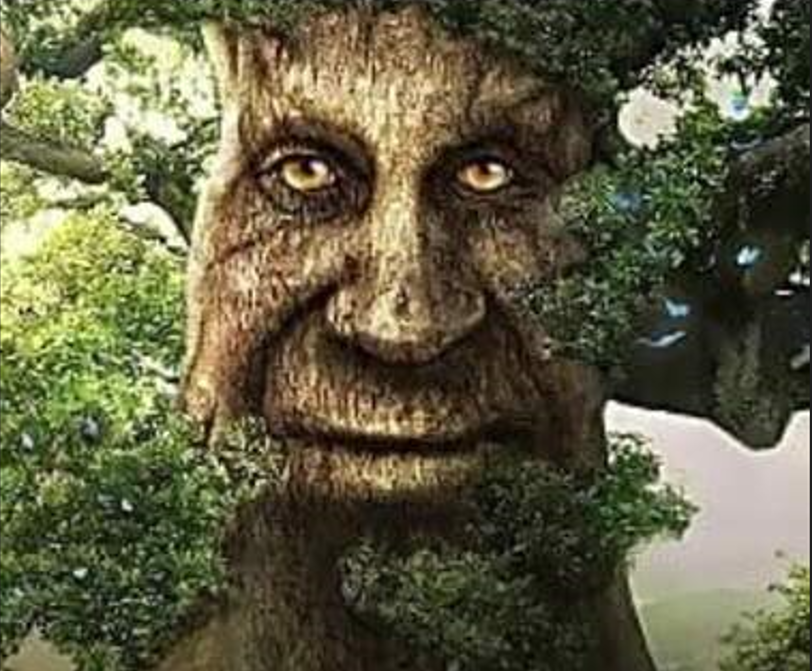

#### In the previous section, the Decision Tree model with max_depth=2 parameter showed the optimal performance. However since we are post-pruning our decision trees in this part, we find it more appropriate to work on a deeper decision tree. In this context, we will be working on two decision trees, with max_depth = 4 and max_depth = 15 parameter.

## Pruning by Information Gain


This method recursively removes the twigs which are causing smallest information gain among other twigs from the decision tree and examine it's prediction performance on validation set. Whenever it reaches at twig removal which leads to a performance drop on prediction, it halts.

```
1: Catalog all twigs in the tree
2: Find the twig with the least Information Gain
3: Remove all child nodes of the twig
4: Relabel twig as a leaf (Set the majority of ”Positive” or ”Negative”
as leaf value)
5: Measure the accuracy value of your decision tree model with removed
twig on the validation set (”Current Accuracy”)
    If ”Current Accuracy ≥ Last Accuracy” : Jump to ”Step1”
    Else : Revert the last changes done in Step 3,4 and then terminate
```



For doing so, we will be splitting our dataset into `(60% train) - (20% validation) - (20% test)`

We will first create a Decision Tree based on Training set and test it on Validation Set. Then prune it, and compare differences.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=24, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=24, shuffle=True)

### Pruning methods:

In [ ]:
def _find_twigs(Node, twigs):
    if isinstance(Node, Leaf):
        return 
    current_is_twig = True 
    for child in Node.child_branches:
        if not isinstance(child, Leaf):
            _find_twigs(child, twigs)
            current_is_twig=False

    if current_is_twig:
        twigs.append(Node)

def find_twig_with_least_info_gain(root_):
    twigs = []
    _find_twigs(root_, twigs)

    if len(twigs) ==0:
        return None
    min_gain = twigs[0].gain
    min_index = 0

    for i, twig in enumerate(twigs):
        if twig.gain < min_gain:
            min_gain = twig.gain
            min_index = i
    return twigs[i], len(twigs)

In [ ]:
import copy

def remove_twig_from_tree(node, twig):
    if isinstance(node, Leaf) or node is None:
        None
    else:

        for i,child in enumerate(node.child_branches):
            if child is twig:
                node.child_branches[i] = Leaf(child.label_counts)
                print("pruned twig predictions: " + str(node.child_branches[i].predictions))
                break
            else:
                remove_twig_from_tree(child, twig)


def remove_twig_from_model(model, twig):
    remove_twig_from_tree(model.root, twig)


def prune_by_least_info_gain(model, X_val, y_val):
    # recursive function, but "model" does not get assigned deeper nodes in the tree, stays at root level

    prev_acc, prev_f, prev_p, prev_r = model.test(X_val, y_val)

    modified_model = copy.deepcopy(model)
    twig, twig_count = find_twig_with_least_info_gain(modified_model.root)
    
    if twig == modified_model.root:
        return model
    remove_twig_from_model(modified_model,twig)

    acc, f, p, r = modified_model.test(X_val, y_val)


    print("Amount of twigs at tree {} \t\tOld acc {}, new acc {}\n".format(twig_count, prev_acc, acc))

    if acc  >= prev_acc:
        return prune_by_least_info_gain(modified_model, X_val, y_val)
    return model


## Pruning Decision Tree with 4 maximum_depth

First, create a Decision Tree based on Training set. Then prune it.

In [ ]:
model = Decision_Tree(4)
model.train(X_train, y_train)

pruned_model = prune_by_least_info_gain(model, X_val, y_val)

#### Comparison of Before and After Pruning:

In [ ]:
print("BEFORE PRUNING:\n")
print_tree(model.root)
print("\n\n")
print("AFTER PRUNING:\n")
print_tree(pruned_model.root)
print("\n")

Previously calculated:


```
BEFORE PRUNING:

which YearsWithCurrManager interval ?
( ,8.50) -- which YearsInCurrentRole interval ?
|           ( ,8.50) -- which YearsAtCompany interval ?
|           |           ( ,15.50) -- which MonthlyIncome interval ?
|           |           |           ( ,7342.67) -- Prediction (Attrition): {'No': '460', 'Yes': '130'}
|           |           |           [7342.67,13634.33) -- Prediction (Attrition): {'No': '79', 'Yes': '19'}
|           |           |           [13634.33, ) -- Prediction (Attrition): {'No': '45', 'Yes': '1'}
|           |           [15.50, ) -- Prediction (Attrition): {'No': '8'}
|           [8.50, ) -- which JobInvolvement interval ?
|                          ( ,2.67) -- Prediction (Attrition): {'No': '20'}
|                          [2.67,3.33) -- which StockOptionLevel interval ?
|                          |           ( ,1.50) -- Prediction (Attrition): {'No': '23', 'Yes': '3'}
|                          |           [1.50, ) -- Prediction (Attrition): {'No': '2'}
|                          [3.33, ) -- Prediction (Attrition): {'No': '4'}
[8.50, ) -- which StockOptionLevel interval ?
               ( ,1.50) -- which Education interval ?
               |           ( ,3.00) -- Prediction (Attrition): {'No': '13'}
               |           [3.00, ) -- which PerformanceRating interval ?
               |                          ( ,3.50) -- Prediction (Attrition): {'No': '45', 'Yes': '4'}
               |                          [3.50, ) -- Prediction (Attrition): {'No': '11'}
               [1.50, ) -- Prediction (Attrition): {'No': '15'}



AFTER PRUNING:

which YearsWithCurrManager interval ?
( ,8.50) -- Prediction (Attrition): {'No': '641', 'Yes': '153'}
[8.50, ) -- Prediction (Attrition): {'No': '84', 'Yes': '4'}
```


After pruning, we can say that:
YearsWithCurrManager is the most important feature, since all other features are pruned. Since "No" labels are big majority in the two remaining leaves,
these leaf nodes have low entropy, and enough to classify the dataset better than non-pruned version of the tree.

For example, why MonthlyIncome branches were pruned? Probably because all children of MonthlyIncome node were predicting "No".
And in such case, this interval split does not provide any usefulness. MonthlyIncome feature does not affect classification result.
It has no function but to reduce computational performance. It should be pruned.

#### Comparing Before and After Pruning Scores:

In [ ]:
print("\nBEFORE PRUNING:")
train_acc, train_f, train_p, train_r = model.test(X_train,y_train)
print("  Train :      F1 Score: {:.3f},   Accuracy: {:.3f}".format(train_f, train_acc))
val_acc, val_f, val_p, val_r = model.test(X_val, y_val)
print("  VALIDATION : F1 Score: {:.3f} ,  Accuracy: {:.3f}".format(val_f, val_acc))
tes_acc, tes_f, tes_p, tes_r = model.test(X_test, y_test)
print("  TEST :       F1 Score: {:.3f} ,  Accuracy: {:.3f} \n".format(tes_f, tes_acc))

print("AFTER PRUNING:")
train_acc, train_f, train_p, train_r = pruned_model.test(X_train,y_train)
print("  Train :      F1 Score: {:.3f},   Accuracy: {:.3f}".format(train_f, train_acc))
val_acc, val_f, val_p, val_r = pruned_model.test(X_val, y_val)
print("  VALIDATION : F1 Score: {:.3f} ,  Accuracy: {:.3f}".format(val_f, val_acc))
tes_acc, tes_f, tes_p, tes_r = pruned_model.test(X_test, y_test)
print("  TEST :       F1 Score: {:.3f} ,  Accuracy: {:.3f} \n".format(tes_f, tes_acc))

Previously calculated:

```
BEFORE PRUNING:
  Train :      F1 Score: 0.622,   Accuracy: 0.822
  VALIDATION : F1 Score: 0.638 ,  Accuracy: 0.881
  TEST :       F1 Score: 0.629 ,  Accuracy: 0.847

AFTER PRUNING:
  Train :      F1 Score: 0.622,   Accuracy: 0.822
  VALIDATION : F1 Score: 0.638 ,  Accuracy: 0.881
  TEST :       F1 Score: 0.629 ,  Accuracy: 0.847
```

It is interesting, yet very Okay to see no change in performance metrics.
Aim of Pruning was to either keep or increase accuracy, while reducing overfitting and computational overdue.
We simply simplified our Decision Tree model.

## Pruning Decision Tree with 15 maximum_depth

First, create a Decision Tree based on Training set. Then prune it.

In [ ]:
model = Decision_Tree(15)
model.train(X_train, y_train)

pruned_model = prune_by_least_info_gain(model, X_val, y_val)

#### Comparison of Before and After Pruning:

In [ ]:
print("BEFORE PRUNING:\n")
print_tree(model.root)
print("\n")

#### Above tree contains very long text lines and might not print well, due to line wrapping settings. Output exceeds size limit.


#### Previously Calculated:  Before Pruning:

Actual output is 372 lines, this is shortened.
<br/>

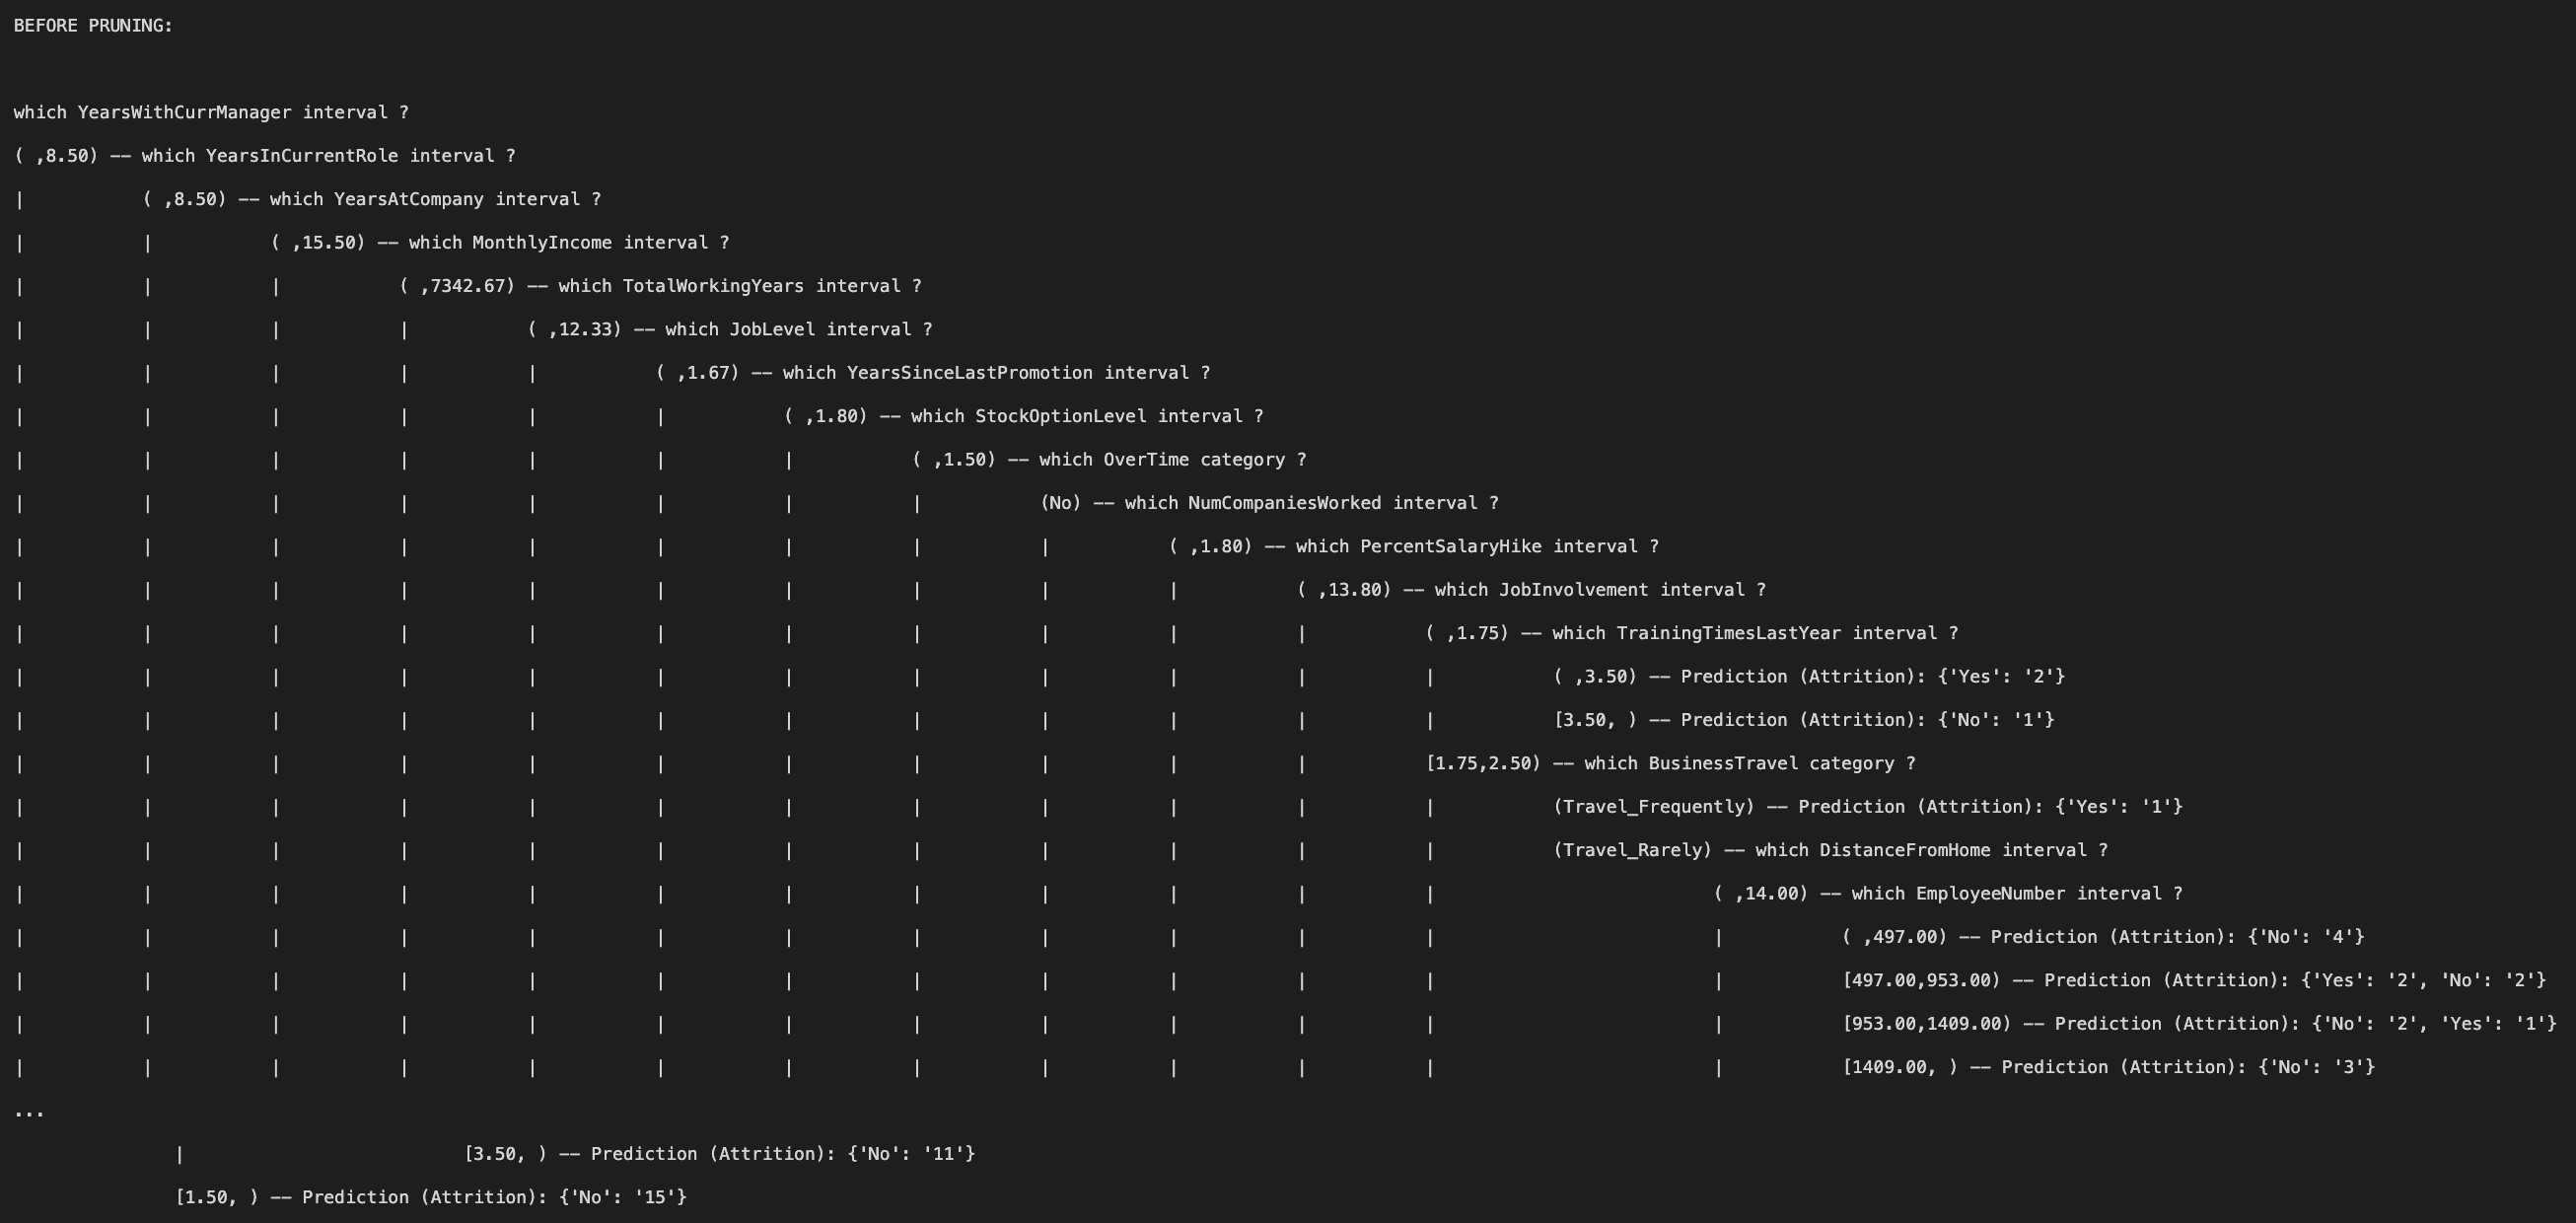
<br/>

##### Another partial view from last lines:
<br/>

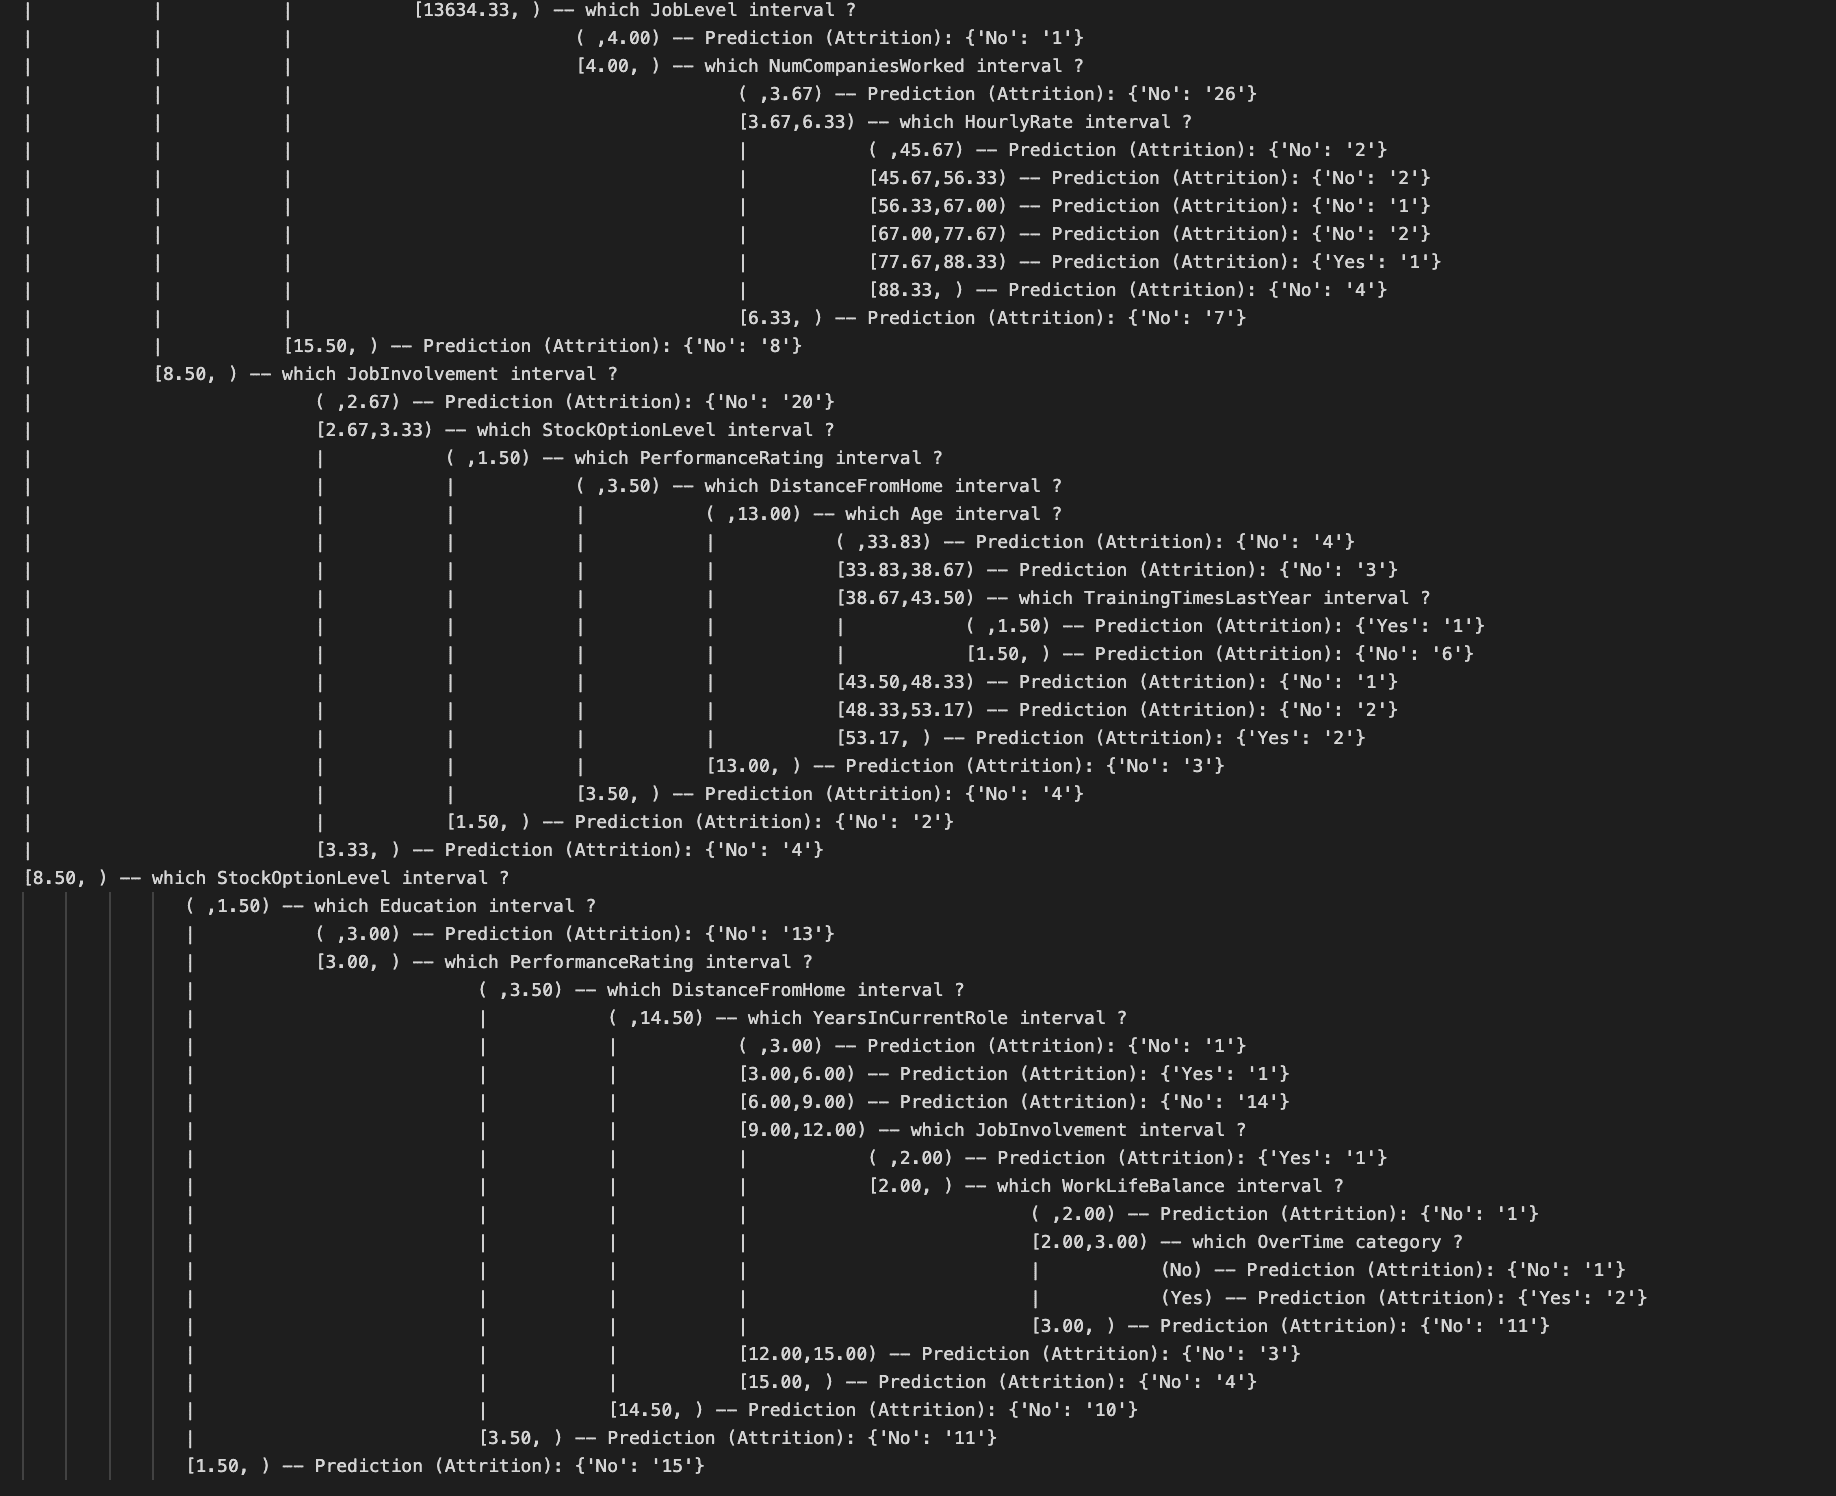

In [ ]:
print("\nAFTER PRUNING:\n")
print_tree(pruned_model.root)
print("\n")

#### Above tree contains very long text lines and might not print well, due to line wrapping settings. Output exceeds size limit.


#### Previously Calculated:  After Pruning:

Actual output is 228 lines, this is shortened.
<br/>

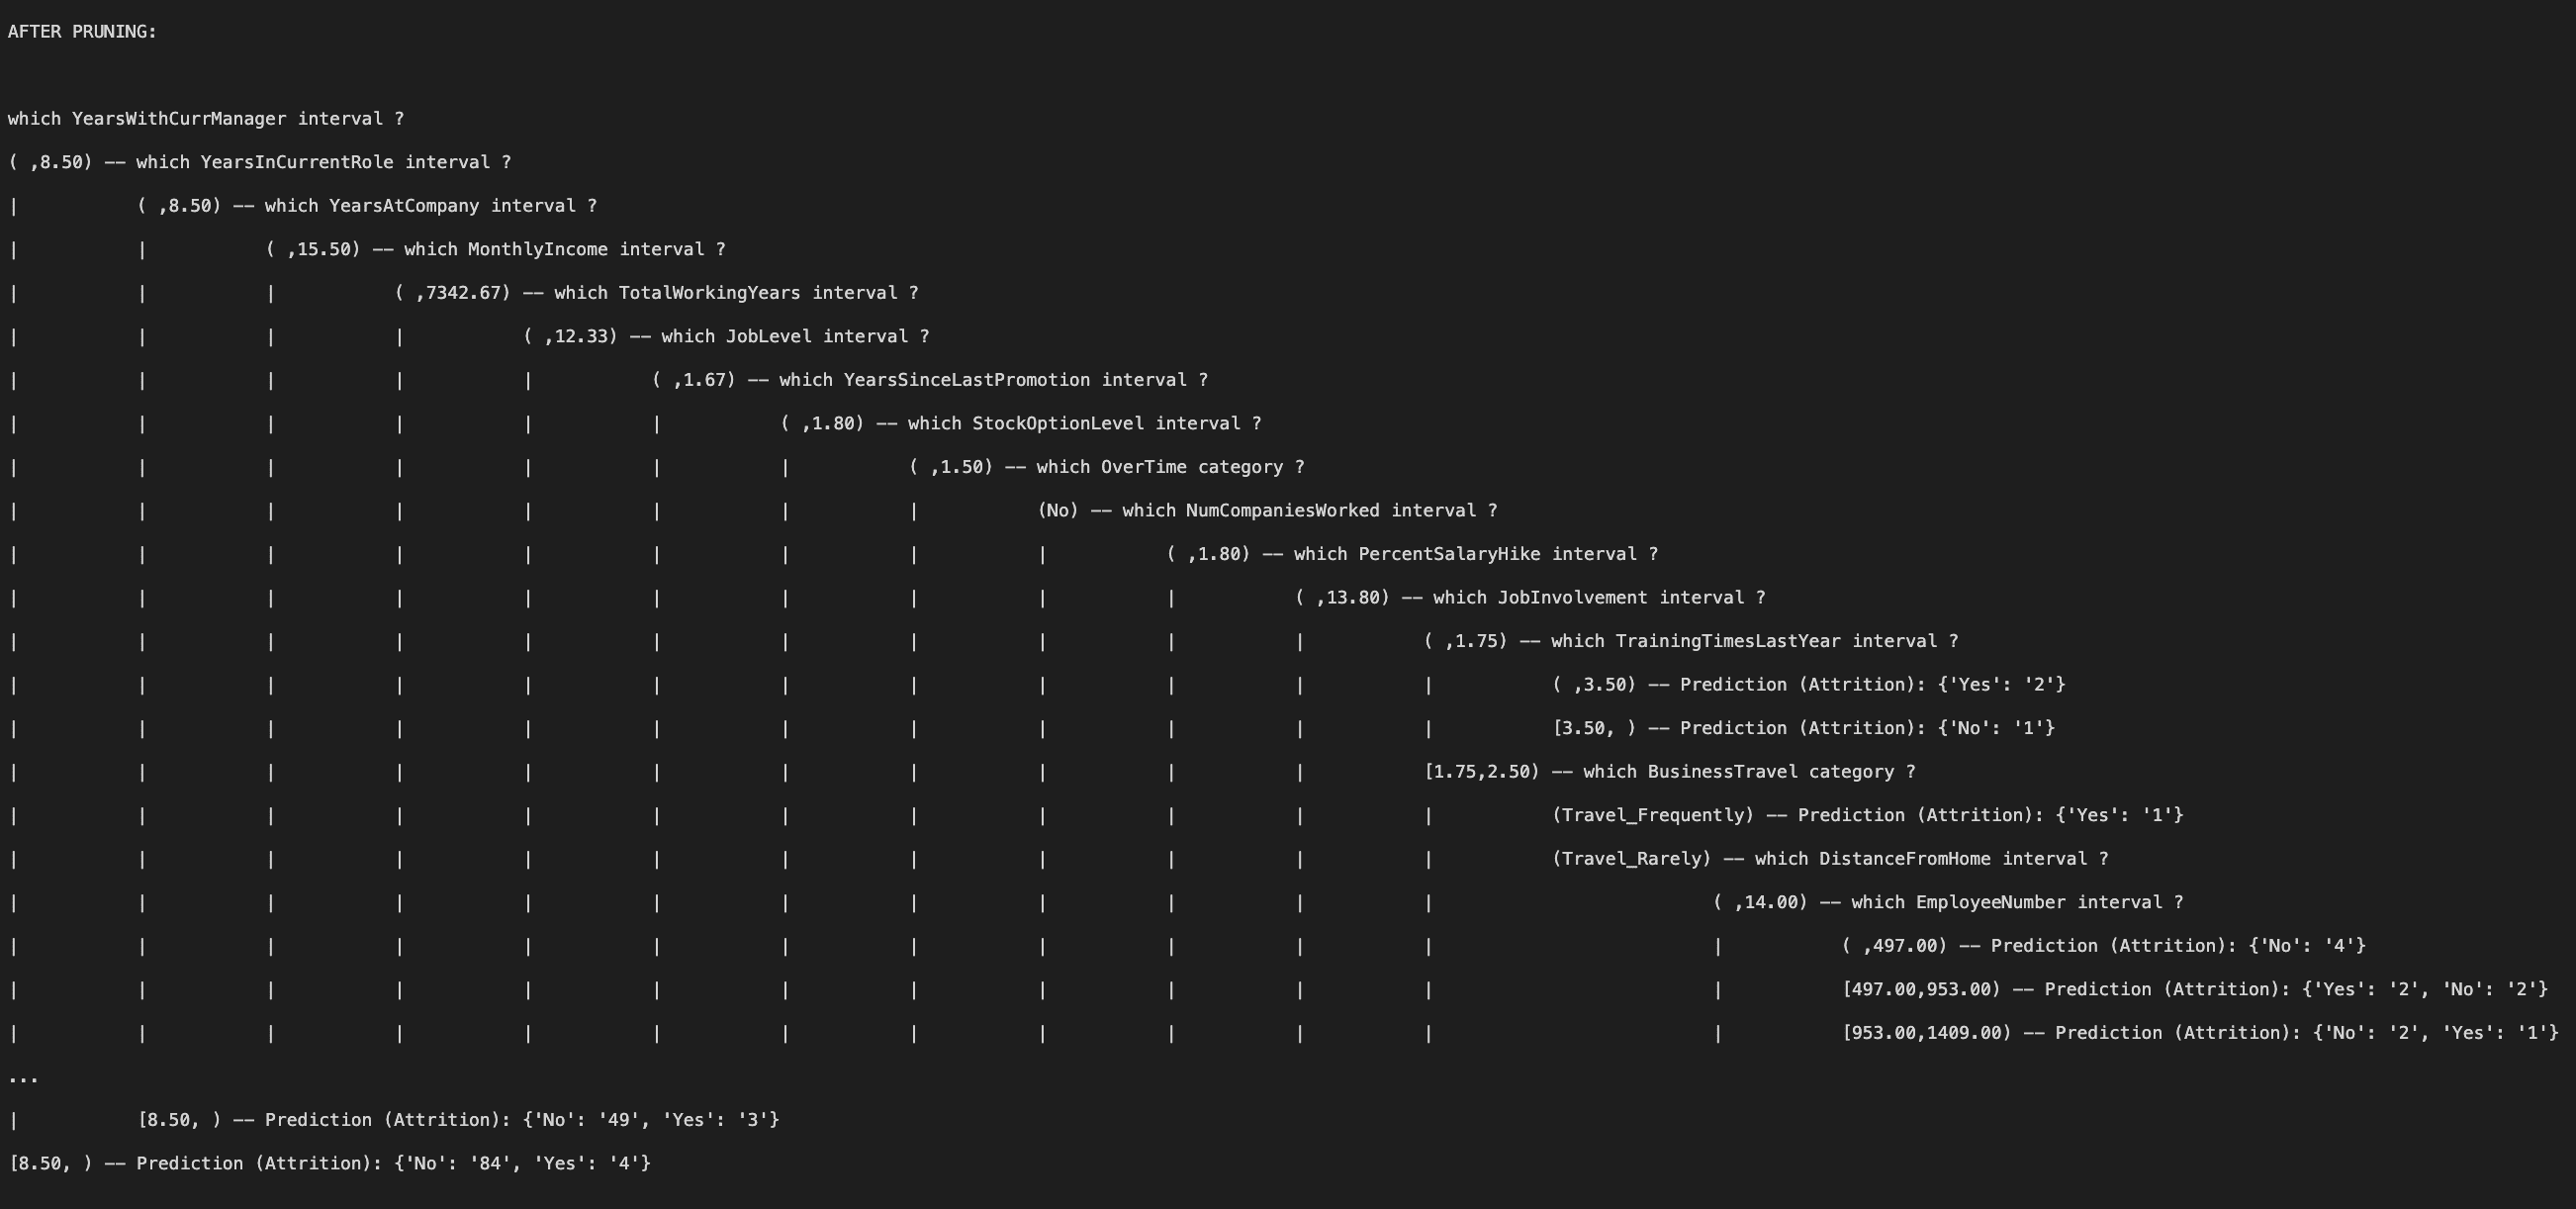

The trees here are for sure complicated to trace and compare.

Yet, looking at the print statements of pruning process in previous section, we can clearly say that some twigs are pruned, twig count reduced from 40 to 23.
The twigs that were removed were features that over-fitting the data and thus reducing the accuracy metric,
as will be seen in the next section by comparing before and after pruning accuracies.

#### Comparing Before and After Pruning Scores:

In [ ]:
print("\nBEFORE PRUNING:")
train_acc, train_f, train_p, train_r = model.test(X_train,y_train)
print("  Train :      F1 Score: {:.3f},   Accuracy: {:.3f}".format(train_f, train_acc))
val_acc, val_f, val_p, val_r = model.test(X_val, y_val)
print("  VALIDATION : F1 Score: {:.3f} ,  Accuracy: {:.3f}".format(val_f, val_acc))
tes_acc, tes_f, tes_p, tes_r = model.test(X_test, y_test)
print("  TEST :       F1 Score: {:.3f} ,  Accuracy: {:.3f} \n\n".format(tes_f, tes_acc))

print("AFTER PRUNING:")
train_acc, train_f, train_p, train_r = pruned_model.test(X_train,y_train)
print("  Train :      F1 Score: {:.3f},   Accuracy: {:.3f}".format(train_f, train_acc))
val_acc, val_f, val_p, val_r = pruned_model.test(X_val, y_val)
print("  VALIDATION : F1 Score: {:.3f} ,  Accuracy: {:.3f}".format(val_f, val_acc))
tes_acc, tes_f, tes_p, tes_r = pruned_model.test(X_test, y_test)
print("  TEST :       F1 Score: {:.3f} ,  Accuracy: {:.3f} \n".format(tes_f, tes_acc))

#### Previously calculated:

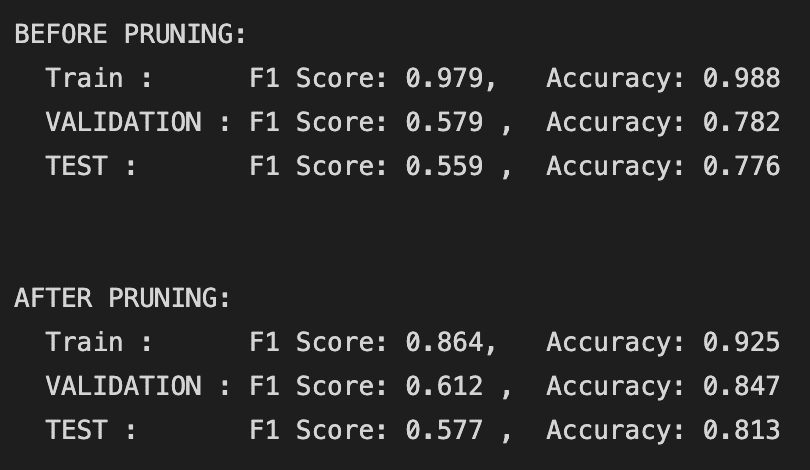

As discussed in Part1, Decision Tree with max_depth=15 was over-fitted to Training data.
As expected, we obtained better Accuracy with Pruning, which proves that we reduced over-fitting.

Cutting many twigs, the model is less complex and more generalized.

#### This is the end of our report.